# Análisis Exploratorio de Datos - HR Analytics

Este notebook contiene el análisis exploratorio de los datos de recursos humanos, enfocándonos en encontrar patrones y variables correlacionadas con la variable target 'attrition'.

In [9]:
# Importación de librerías necesarias (solo usando las disponibles en requirements.txt)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuración de visualización
sns.set_theme()  # Usar el tema por defecto de seaborn
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [10]:
# Carga de datos
df = pd.read_csv('../data/clean/encoded_data.csv')
print('\nDimensiones del dataset:', df.shape)
print('\nPrimeras 5 filas del dataset:')
df.head()


Dimensiones del dataset: (4410, 50)

Primeras 5 filas del dataset:


,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,0,6,2,1,1,0,1,131160,1.0,...,False,False,False,False,False,False,False,False,True,False
1,31,1,10,1,1,2,0,1,41890,0.0,...,False,False,False,False,True,False,False,False,False,True
2,32,0,17,4,1,3,1,4,193280,1.0,...,False,False,False,False,False,True,False,False,True,False
3,38,0,2,5,1,4,1,3,83210,3.0,...,False,False,False,False,False,False,False,False,True,False
4,32,0,10,1,1,5,1,1,23420,4.0,...,False,False,False,False,False,True,False,False,False,True


## 1. Análisis de la Variable Target (Attrition)

Analizaremos la distribución de nuestra variable objetivo para entender el desbalance de clases.

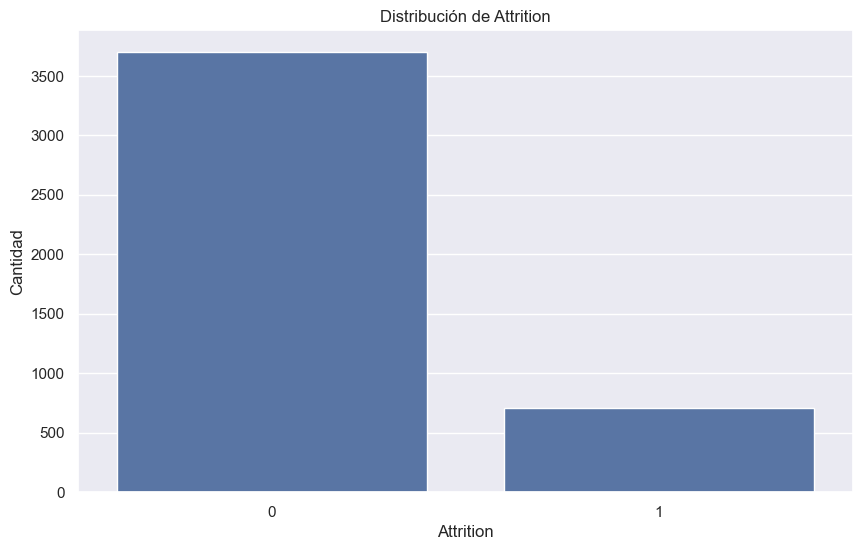


Porcentaje de Attrition:
Attrition
0    83.877551
1    16.122449
Name: proportion, dtype: float64


In [11]:
# Distribución de Attrition
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Attrition')
plt.title('Distribución de Attrition')
plt.xlabel('Attrition')
plt.ylabel('Cantidad')
plt.show()

# Porcentajes
attrition_pct = df['Attrition'].value_counts(normalize=True) * 100
print('\nPorcentaje de Attrition:')
print(attrition_pct)

## 2. Análisis de Variables Numéricas

Analizaremos las correlaciones entre las variables numéricas y la variable target.

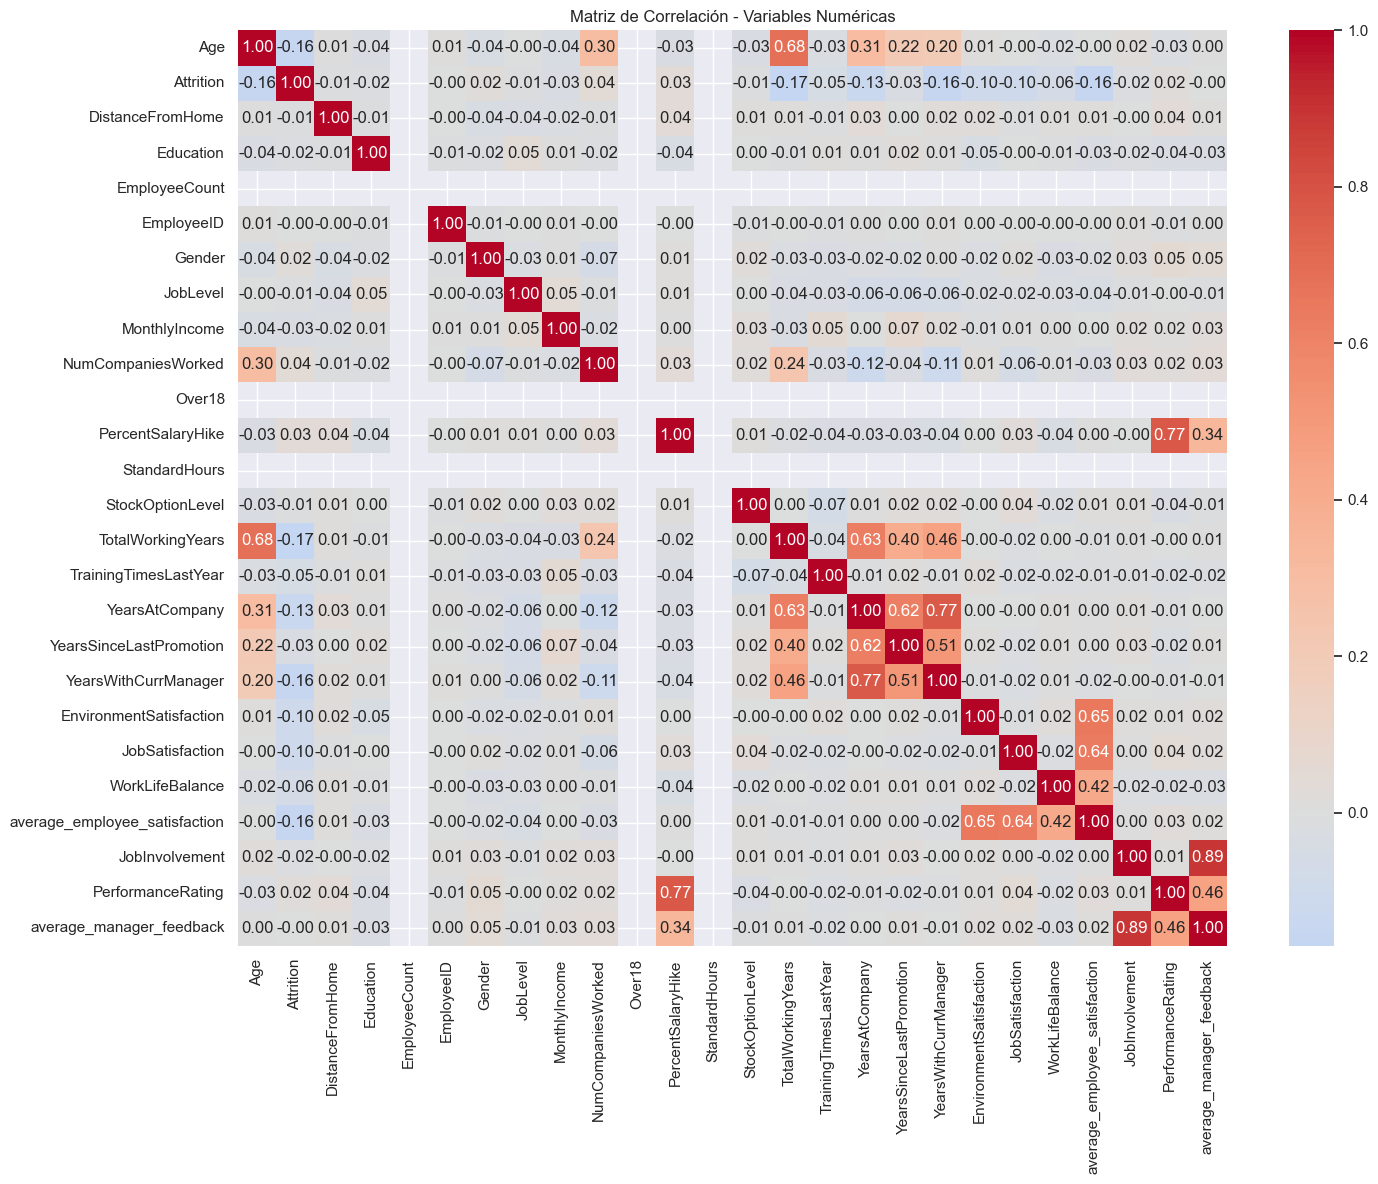

In [12]:
# Seleccionar variables numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calcular correlaciones
correlation_matrix = df[numeric_cols].corr()

# Visualizar mapa de calor de correlaciones
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matriz de Correlación - Variables Numéricas')
plt.tight_layout()
plt.show()

c:\Users\afern\OneDrive\Documentos\UPC\DATA SCIENCIE\repo_pc\metodologia_pc1\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\afern\OneDrive\Documentos\UPC\DATA SCIENCIE\repo_pc\metodologia_pc1\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


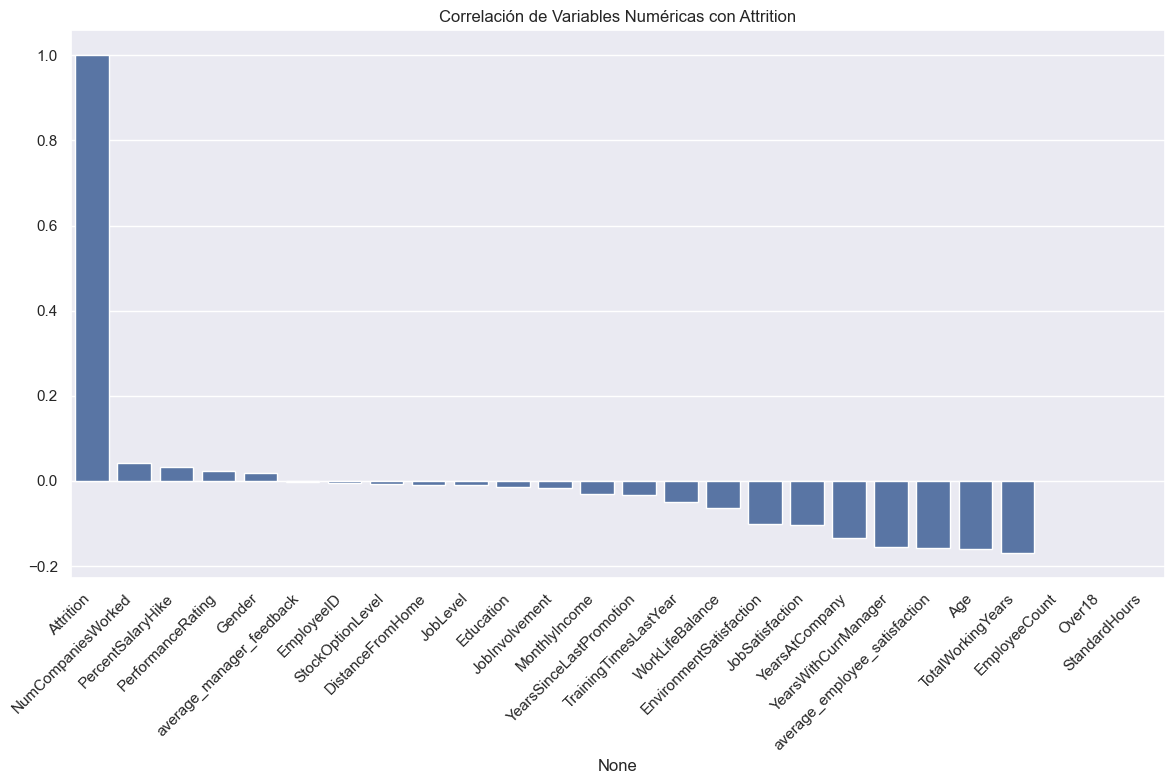


Top 5 correlaciones positivas:
Attrition             1.000000
NumCompaniesWorked    0.042345
PercentSalaryHike     0.032533
PerformanceRating     0.023403
Gender                0.018125
dtype: float64

Top 5 correlaciones negativas:
Age                 -0.159205
TotalWorkingYears   -0.170338
EmployeeCount             NaN
Over18                    NaN
StandardHours             NaN
dtype: float64


In [13]:
# Correlaciones con Attrition
correlations = df[numeric_cols].corrwith(df['Attrition']).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=correlations.index, y=correlations.values)
plt.xticks(rotation=45, ha='right')
plt.title('Correlación de Variables Numéricas con Attrition')
plt.tight_layout()
plt.show()

print('\nTop 5 correlaciones positivas:')
print(correlations.head())
print('\nTop 5 correlaciones negativas:')
print(correlations.tail())

## 3. Análisis de Variables Categóricas

Analizaremos la relación entre las variables categóricas y el attrition.

In [14]:
def plot_categorical_analysis(df, column):
    plt.figure(figsize=(12, 6))
    
    # Calcular porcentajes de Attrition por categoría
    attrition_by_cat = pd.crosstab(df[column], df['Attrition'], normalize='index') * 100
    
    # Crear gráfico usando seaborn
    sns.barplot(x=attrition_by_cat.index, y=attrition_by_cat[1])
    plt.title(f'Porcentaje de Attrition por {column}')
    plt.ylabel('Porcentaje de Attrition')
    plt.xlabel(column)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    print(f'\nPorcentaje de Attrition por {column}:')
    print(attrition_by_cat[1].sort_values(ascending=False))

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_analysis(df, column):
    """
    Función para analizar y visualizar la relación entre variables categóricas y attrition.
    Soporta tanto variables categóricas normales como variables dummy codificadas.
    
    Args:
        df (pd.DataFrame): DataFrame con los datos
        column (str): Nombre de la columna categórica a analizar
    """
    plt.figure(figsize=(12, 6))
    
    # Verificar si la columna está codificada como dummy
    if column not in df.columns:
        # Buscar columnas dummy relacionadas
        dummy_cols = [col for col in df.columns if col.startswith(f"{column}_")]
        if not dummy_cols:
            raise ValueError(f"No se encontraron columnas relacionadas con {column}")
            
        # Reconstruir la variable categórica original
        categories = []
        for idx, row in df[dummy_cols].iterrows():
            cat = next((col.replace(f"{column}_", "") for col, val in row.items() if val == 1), None)
            categories.append(cat)
        
        # Crear una serie temporal con la categoría reconstruida
        temp_series = pd.Series(categories, index=df.index)
        
        # Calcular porcentajes de Attrition por categoría
        attrition_by_cat = pd.crosstab(temp_series, df['Attrition'], normalize='index') * 100
    else:
        # Si la columna existe, usar el código original
        attrition_by_cat = pd.crosstab(df[column], df['Attrition'], normalize='index') * 100
    
    # Crear gráfico usando seaborn
    sns.barplot(x=attrition_by_cat.index, y=attrition_by_cat[1])
    plt.title(f'Porcentaje de Attrition por {column}')
    plt.ylabel('Porcentaje de Attrition')
    plt.xlabel(column)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    print(f'\nPorcentaje de Attrition por {column}:')
    print(attrition_by_cat[1].sort_values(ascending=False))

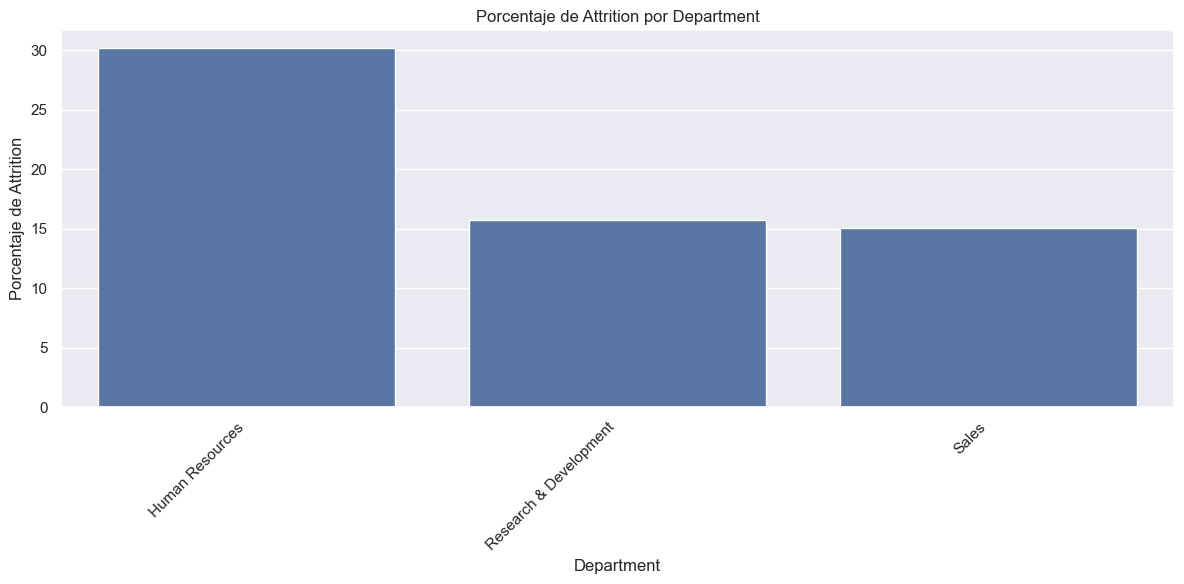


Porcentaje de Attrition por Department:
row_0
Human Resources           30.158730
Research & Development    15.712799
Sales                     15.022422
Name: 1, dtype: float64


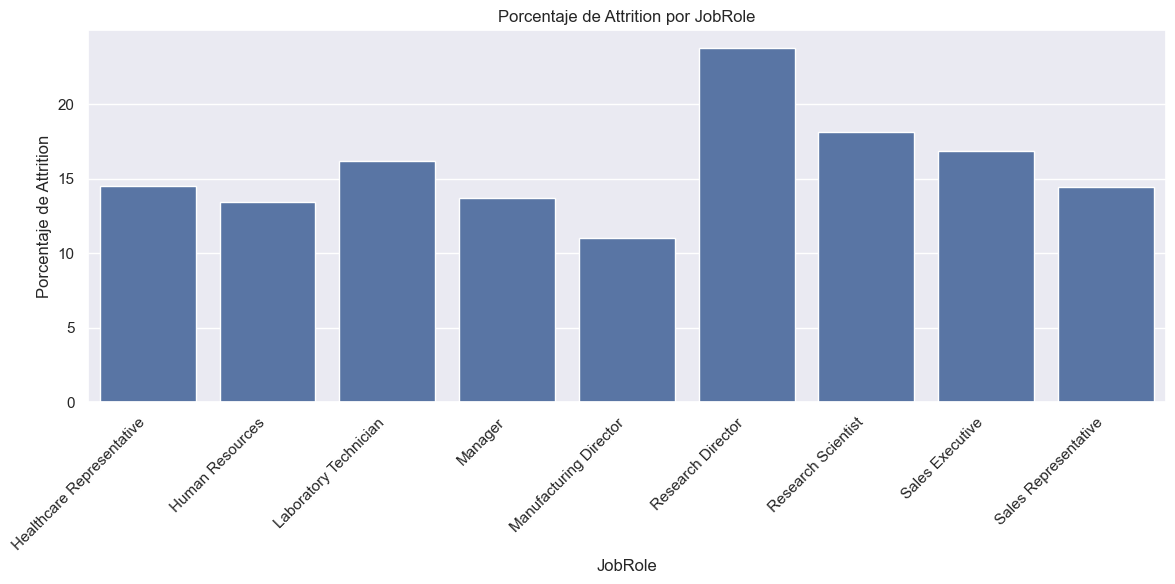


Porcentaje de Attrition por JobRole:
row_0
Research Director            23.750000
Research Scientist           18.150685
Sales Executive              16.871166
Laboratory Technician        16.216216
Healthcare Representative    14.503817
Sales Representative         14.457831
Manager                      13.725490
Human Resources              13.461538
Manufacturing Director       11.034483
Name: 1, dtype: float64


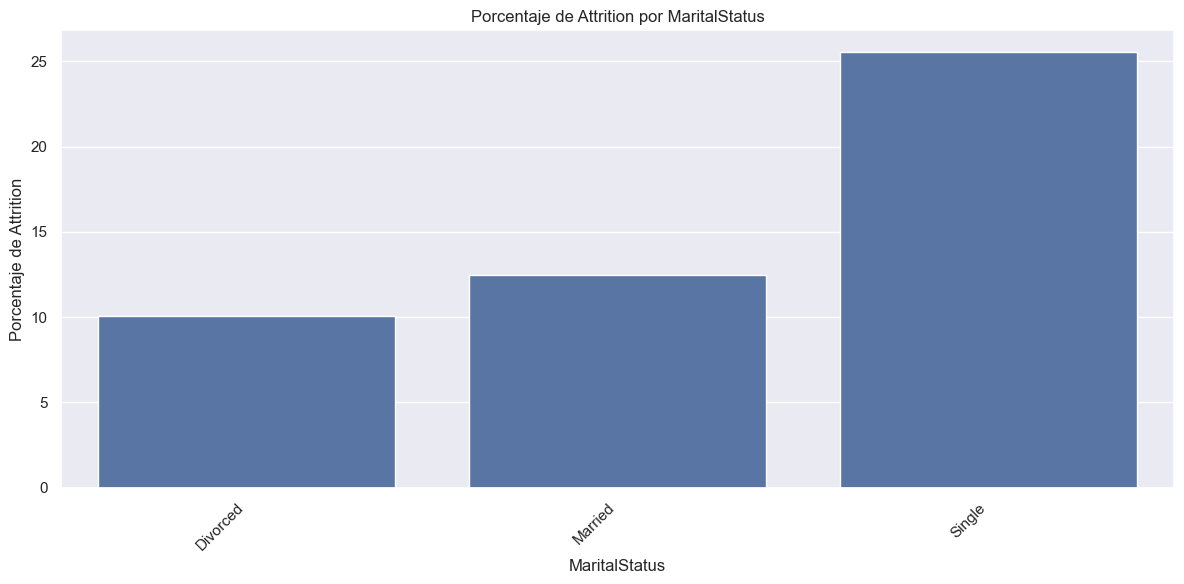


Porcentaje de Attrition por MaritalStatus:
row_0
Single      25.531915
Married     12.481426
Divorced    10.091743
Name: 1, dtype: float64


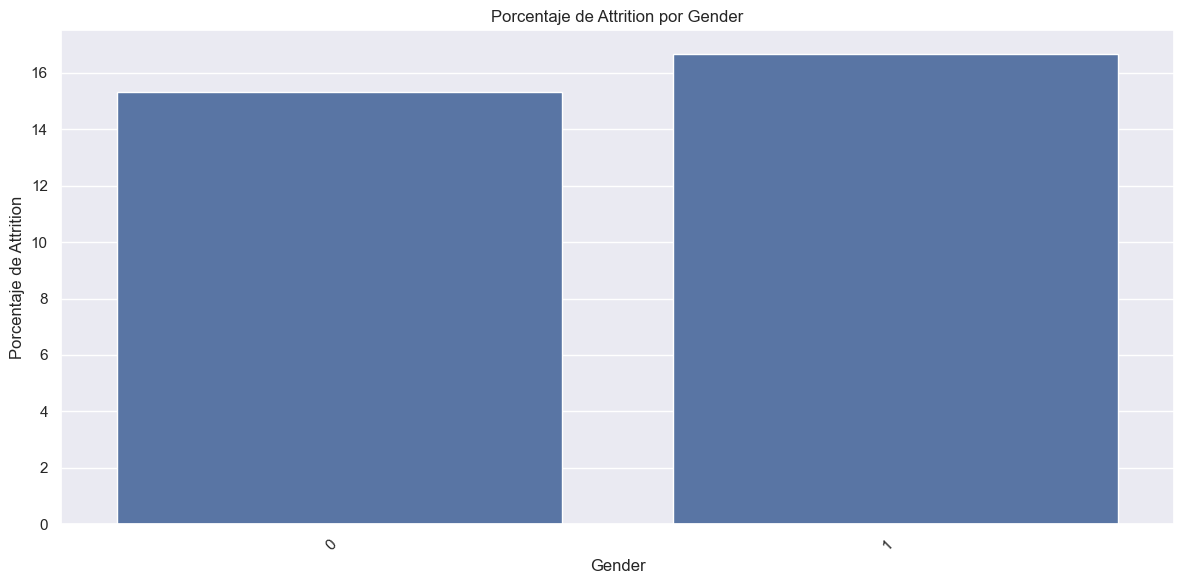


Porcentaje de Attrition por Gender:
Gender
1    16.666667
0    15.306122
Name: 1, dtype: float64


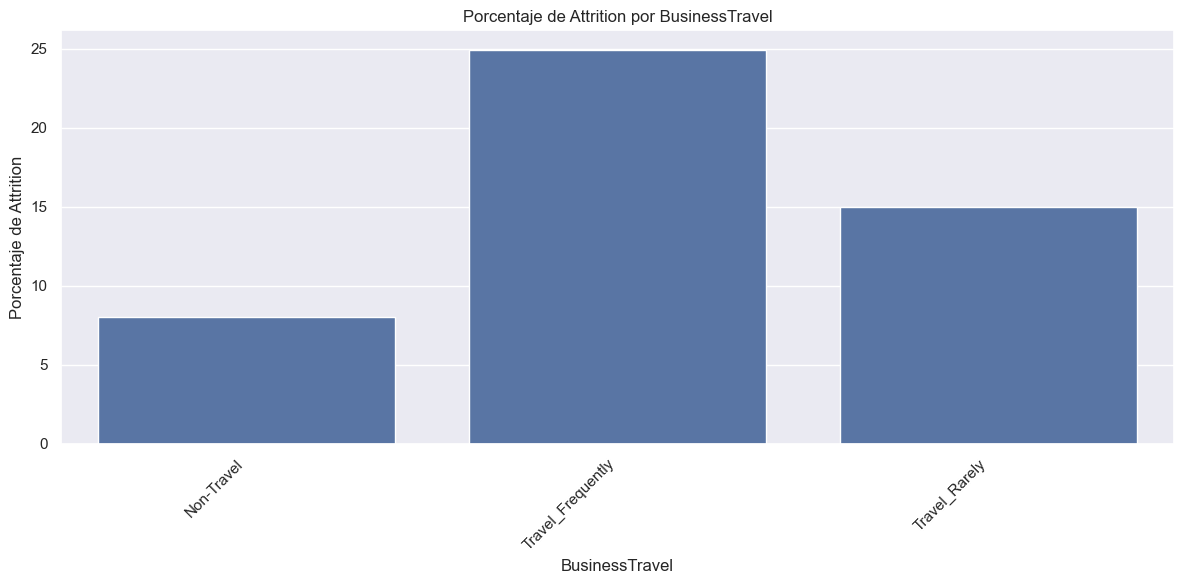


Porcentaje de Attrition por BusinessTravel:
row_0
Travel_Frequently    24.909747
Travel_Rarely        14.956855
Non-Travel            8.000000
Name: 1, dtype: float64


In [19]:
categorical_cols = ['Department', 'JobRole', 'MaritalStatus', 'Gender', 'BusinessTravel']

for col in categorical_cols:
    plot_categorical_analysis(df, col)

## 4. Análisis de Satisfacción y Feedback

Analizaremos cómo la satisfacción del empleado y el feedback del manager se relacionan con el attrition.

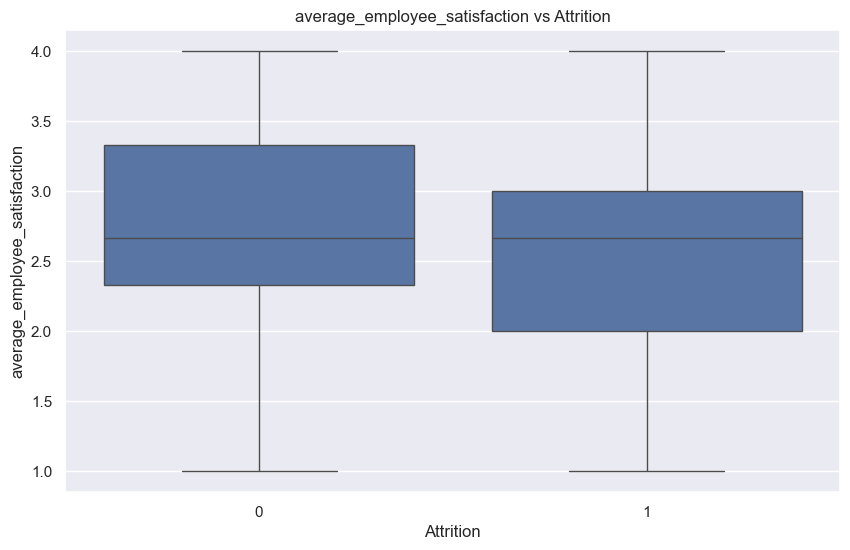


T-test para average_employee_satisfaction:
T-statistic: 10.5904
P-value: 0.0000


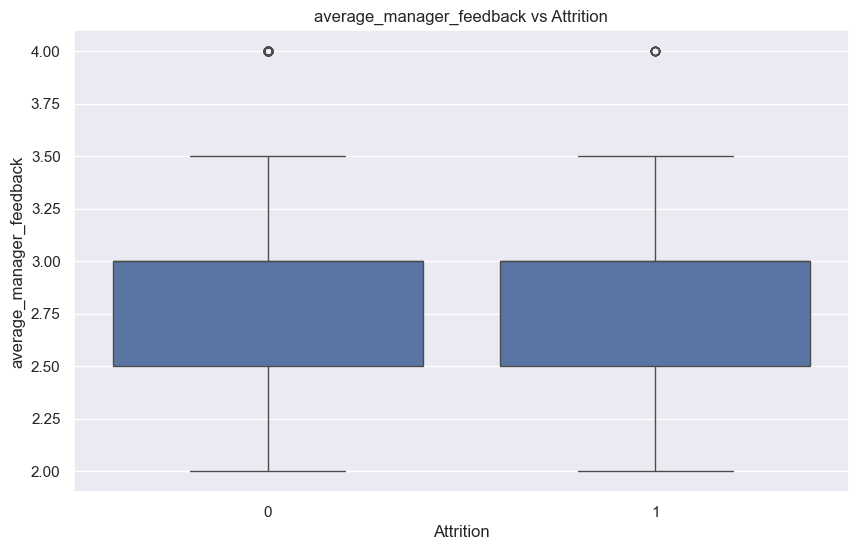


T-test para average_manager_feedback:
T-statistic: 0.2194
P-value: 0.8264


In [20]:
satisfaction_cols = ['average_employee_satisfaction', 'average_manager_feedback']

for col in satisfaction_cols:
    plt.figure(figsize=(10, 6))
    
    # Crear boxplot usando seaborn
    sns.boxplot(data=df, x='Attrition', y=col)
    plt.title(f'{col} vs Attrition')
    plt.show()
    
    # T-test
    t_stat, p_val = stats.ttest_ind(
        df[df['Attrition'] == 0][col],
        df[df['Attrition'] == 1][col]
    )
    print(f'\nT-test para {col}:')
    print(f'T-statistic: {t_stat:.4f}')
    print(f'P-value: {p_val:.4f}')

## 5. Análisis de Variables Temporales

Analizaremos cómo las variables relacionadas con el tiempo afectan al attrition.

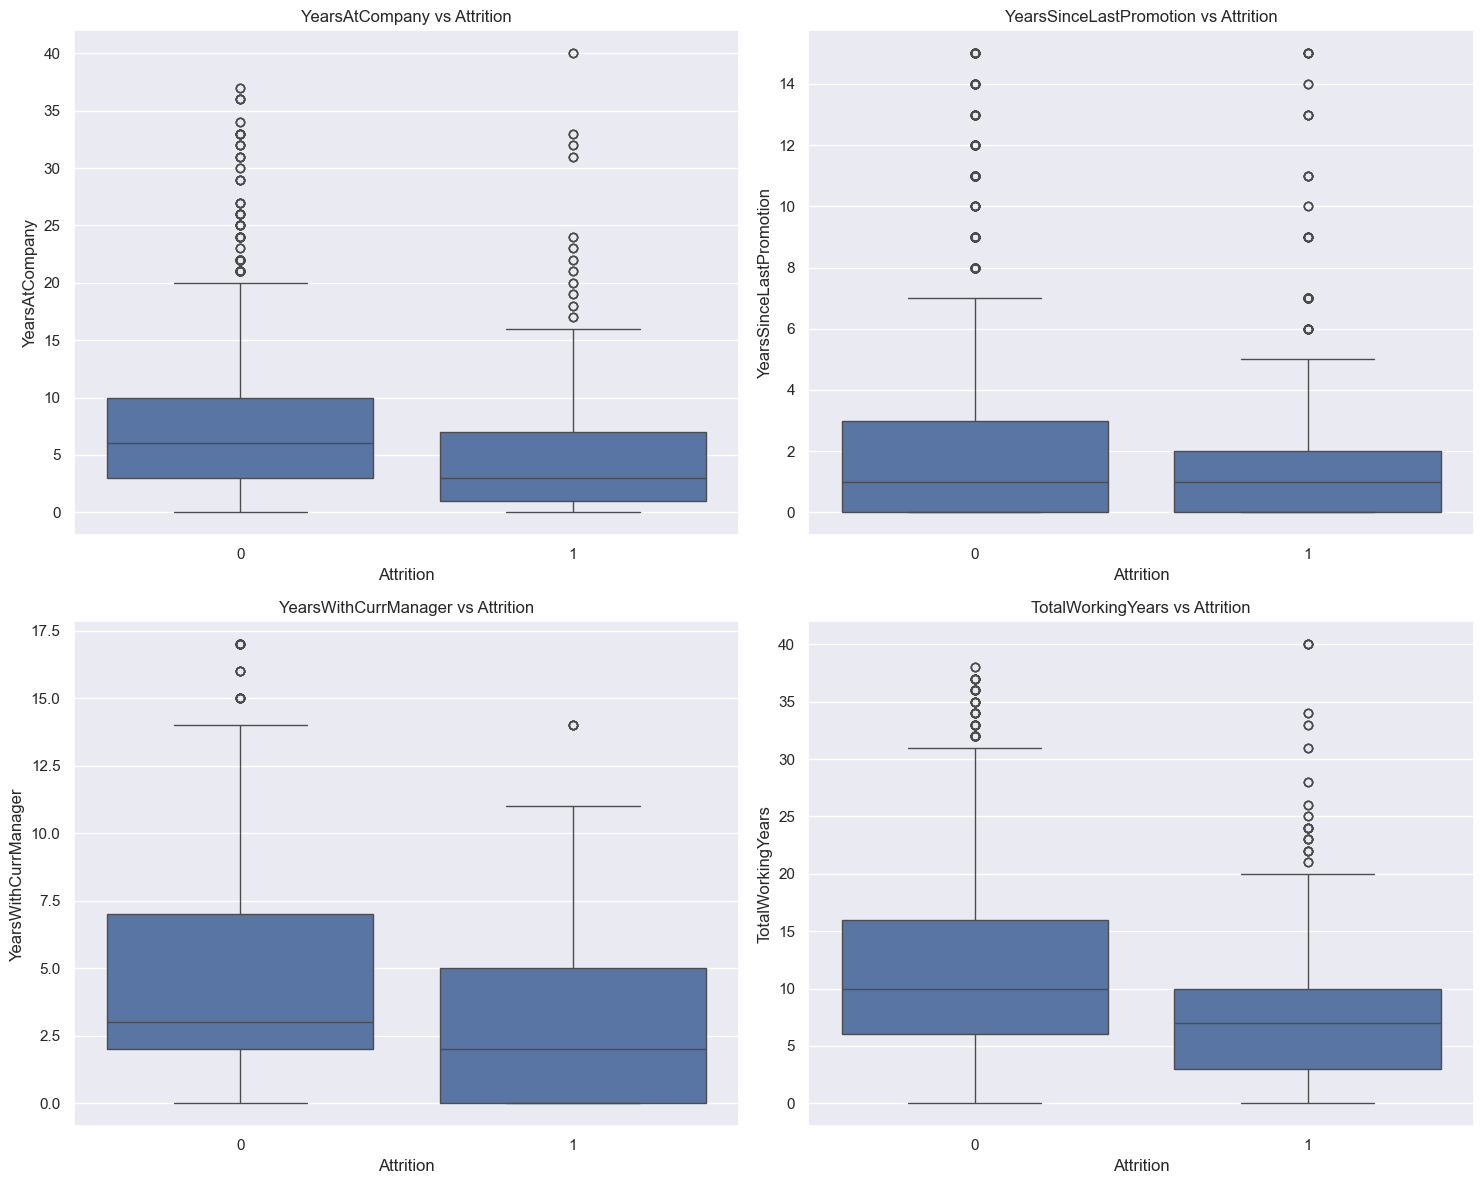


Estadísticas para YearsAtCompany:
            count      mean       std  min  25%  50%   75%   max
Attrition                                                       
0          3699.0  7.369019  6.094649  0.0  3.0  6.0  10.0  37.0
1           711.0  5.130802  5.941598  0.0  1.0  3.0   7.0  40.0

Estadísticas para YearsSinceLastPromotion:
            count      mean       std  min  25%  50%  75%   max
Attrition                                                      
0          3699.0  2.234388  3.233887  0.0  0.0  1.0  3.0  15.0
1           711.0  1.945148  3.148633  0.0  0.0  1.0  2.0  15.0

Estadísticas para YearsWithCurrManager:
            count      mean       std  min  25%  50%  75%   max
Attrition                                                      
0          3699.0  4.367397  3.593144  0.0  2.0  3.0  7.0  17.0
1           711.0  2.852321  3.138918  0.0  0.0  2.0  5.0  14.0

Estadísticas para TotalWorkingYears:
            count       mean       std  min  25%   50%   75%   max
Att

In [24]:
time_cols = ['YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TotalWorkingYears']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(time_cols):
    sns.boxplot(data=df, x='Attrition', y=col, ax=axes[idx])
    axes[idx].set_title(f'{col} vs Attrition')

plt.tight_layout()
plt.show()

# Estadísticas descriptivas por grupo
for col in time_cols:
    print(f'\nEstadísticas para {col}:')
    print(df.groupby('Attrition')[col].describe())

## 6. Conclusiones

Las conclusiones detalladas de este análisis se encuentran en el archivo 'conclusiones_analisis_exploratorio.md'. Los principales hallazgos incluyen:

1. Existe un desbalance natural en la variable target (16-17% attrition)
2. Las variables más correlacionadas con attrition son:
   - Overtime (positiva)
   - YearsAtCompany (negativa)
   - Age (negativa)
3. Los departamentos de Ventas y RRHH muestran mayores tasas de abandono
4. La satisfacción del empleado y el feedback del manager son indicadores importantes
5. Los primeros 5 años en la empresa son críticos para el attrition